In [1]:
import pandas as pd

In [4]:
total_df = pd.read_csv('../../발표/data/종합점수 total_score.csv')
total_df

,시군명,총인구수,1인당grdp,지역화폐사용액,인구소멸,종합점수,등급
0,가평군,61977,3215,3007,0.29,0.037880,5
1,고양시,1076950,2114,11730,0.91,0.461967,2
2,과천시,80025,6885,3395,0.99,0.351292,3
3,광명시,282510,2754,12337,0.84,0.314556,3
4,광주시,391398,2829,15114,0.84,0.351203,3
5,구리시,188106,1871,7873,0.87,0.266677,4
6,군포시,200571,2721,10146,0.90,0.307661,4
7,김포시,485451,3235,14046,0.98,0.417043,2
8,남양주시,734145,1822,20827,0.78,0.405926,3
9,동두천시,89725,1939,1954,0.48,0.080128,5


In [21]:
# 독립변수와 종속변수 설정
x = total_df[['총인구수', '1인당grdp', '인구소멸']]
y = total_df['지역화폐사용액']

In [18]:
import statsmodels.api as sm

feature_add = sm.add_constant(x, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   종합점수   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.101e+25
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          3.53e-306
Time:                        09:55:43   Log-Likelihood:                 852.68
No. Observations:                  30   AIC:                            -1695.
Df Residuals:                      25   BIC:                            -1688.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1480   7.27e-14  -2.04e+12      0.000      -0.148      -0.148
총인구수        1.736e-07   1.36e-19   1.28e+12      0.000    1.74e-07    1.74e-07
1인당grdp     1.758e-05   9.64e-18   1.82e+12      0.000    1.76e-05    1.76e-05
인구소멸           0.3478   9.67e-14    3.6e+12      0.000       0.348       0.348
지역화폐사용액     5.916e-06   5.57e-18   1.06e+12      0.000    5.92e-06    5.92e-06
==============================================================================
Omnibus:                        7.853   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.020   Jarque-Bera (JB):               10.076
Skew:                          -0.434   Prob(JB):                      0.00649
Kurtosis:                       5.703   Cond. No.                     2.83e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# matplotlib 한글 
import platform
if platform.system() == 'Darwin' : 
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

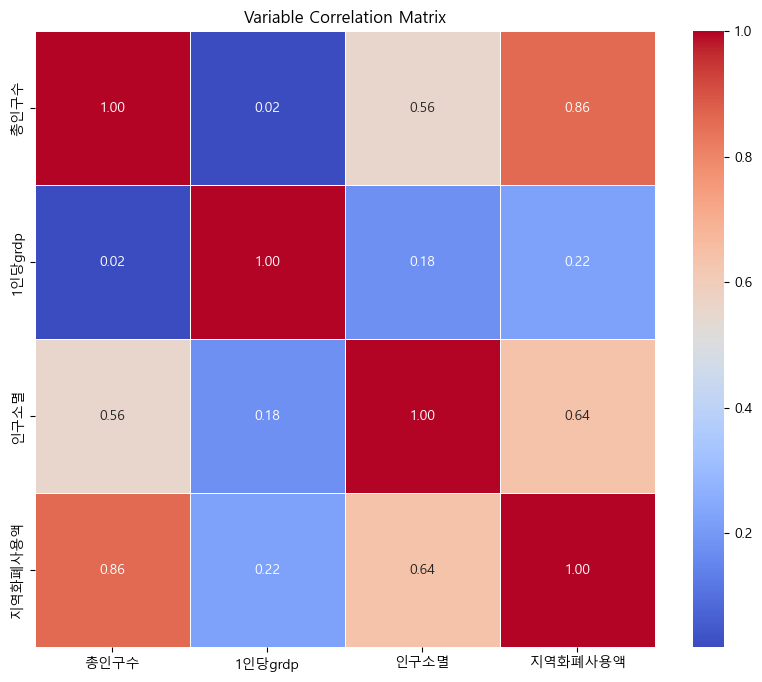

In [20]:
# 상관관계 매트릭스 생성
correlation_matrix = total_df[['총인구수', '1인당grdp', '인구소멸','지역화폐사용액']].corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Variable Correlation Matrix')
plt.show()

In [15]:
## 인당지역화폐사용액 컬럼
total_df['인당사용액'] = total_df['지역화폐사용액'] / total_df['총인구수'] * 1000000
total_df['인당사용액'] = total_df['인당사용액'].astype(int)
total_df

,시군명,총인구수,1인당grdp,지역화폐사용액,인구소멸,종합점수,등급,인당사용액
0,가평군,61977,3215,3007,0.29,0.037880,5,48517
1,고양시,1076950,2114,11730,0.91,0.461967,2,10891
2,과천시,80025,6885,3395,0.99,0.351292,3,42424
3,광명시,282510,2754,12337,0.84,0.314556,3,43669
4,광주시,391398,2829,15114,0.84,0.351203,3,38615
5,구리시,188106,1871,7873,0.87,0.266677,4,41854
6,군포시,200571,2721,10146,0.90,0.307661,4,50585
7,김포시,485451,3235,14046,0.98,0.417043,2,28933
8,남양주시,734145,1822,20827,0.78,0.405926,3,28369
9,동두천시,89725,1939,1954,0.48,0.080128,5,21777


c:\Users\Jws\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\Jws\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


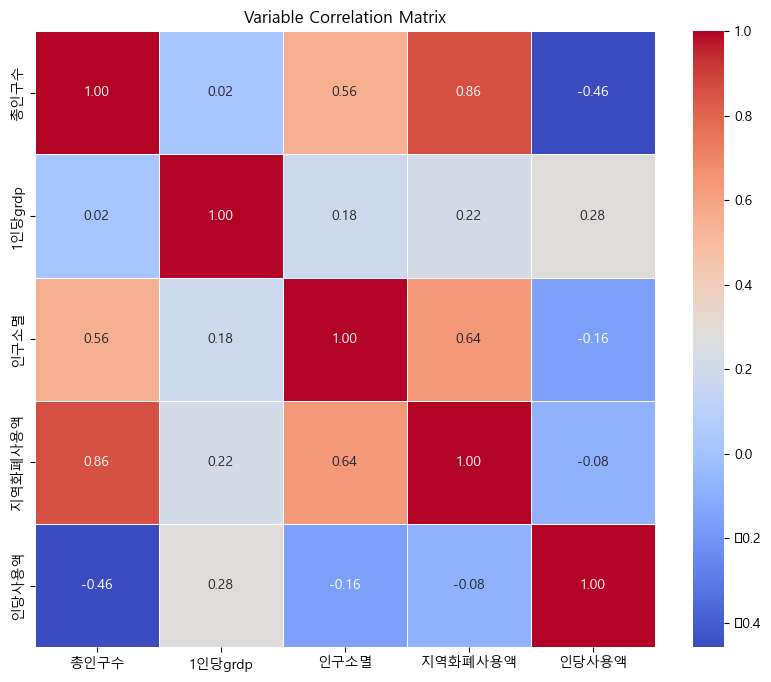

In [16]:
# 상관관계 매트릭스 생성
correlation_matrix = total_df[['총인구수', '1인당grdp', '인구소멸','지역화폐사용액','인당사용액']].corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Variable Correlation Matrix')
plt.show()

In [22]:
df_new_2023 = pd.read_csv('../../발표/data/가입자수포함 df_new_2023.csv')
df_new_2023

,시군명,기준년월,신규가입자수,충전액,사용액,누적가입자수,가입자수당충전액,가입자수당사용액,전달 대비 충전액,전달 대비 사용액,총인구수,인센티브,월지급한도,가맹점수,인구수당충전액
0,가평군,2023-01,717,3140,3540,39987,78525,88528,-460,-456,62114,0.1,50000,3354,50552
1,가평군,2023-02,769,3032,3092,40756,74393,75866,-108,-448,62069,0.1,50000,3354,48848
2,가평군,2023-03,3130,4284,3609,43886,97616,82235,1252,517,61969,0.1,500000,3354,69131
3,가평군,2023-04,855,3668,4057,44741,81982,90677,-616,448,61915,0.1,500000,3354,59242
4,가평군,2023-05,871,5064,3785,45612,111023,82982,1396,-272,61836,0.1,500000,3354,81894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,화성시,2023-07,8026,36869,36480,747684,49310,48790,72,211,932626,0.1,30000,27663,39532
305,화성시,2023-08,7804,34116,35008,755488,45157,46338,-2753,-1472,934287,0.1,30000,27663,36515
306,화성시,2023-09,7792,40559,36188,763280,53137,47411,6443,1180,937189,0.1,30000,27663,43277
307,화성시,2023-10,7667,37117,38199,770947,48144,49548,-3442,2011,939302,0.1,30000,27663,39515


In [24]:
total_df_filter = total_df[['시군명','1인당grdp','인구소멸']]

In [26]:
combined_df = pd.merge(df_new_2023, total_df_filter, how='left',on='시군명')
combined_df

,시군명,기준년월,신규가입자수,충전액,사용액,누적가입자수,가입자수당충전액,가입자수당사용액,전달 대비 충전액,전달 대비 사용액,총인구수,인센티브,월지급한도,가맹점수,인구수당충전액,1인당grdp,인구소멸
0,가평군,2023-01,717,3140,3540,39987,78525,88528,-460,-456,62114,0.1,50000,3354,50552,3215,0.29
1,가평군,2023-02,769,3032,3092,40756,74393,75866,-108,-448,62069,0.1,50000,3354,48848,3215,0.29
2,가평군,2023-03,3130,4284,3609,43886,97616,82235,1252,517,61969,0.1,500000,3354,69131,3215,0.29
3,가평군,2023-04,855,3668,4057,44741,81982,90677,-616,448,61915,0.1,500000,3354,59242,3215,0.29
4,가평군,2023-05,871,5064,3785,45612,111023,82982,1396,-272,61836,0.1,500000,3354,81894,3215,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,화성시,2023-07,8026,36869,36480,747684,49310,48790,72,211,932626,0.1,30000,27663,39532,10484,1.44
305,화성시,2023-08,7804,34116,35008,755488,45157,46338,-2753,-1472,934287,0.1,30000,27663,36515,10484,1.44
306,화성시,2023-09,7792,40559,36188,763280,53137,47411,6443,1180,937189,0.1,30000,27663,43277,10484,1.44
307,화성시,2023-10,7667,37117,38199,770947,48144,49548,-3442,2011,939302,0.1,30000,27663,39515,10484,1.44


c:\Users\Jws\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\Jws\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


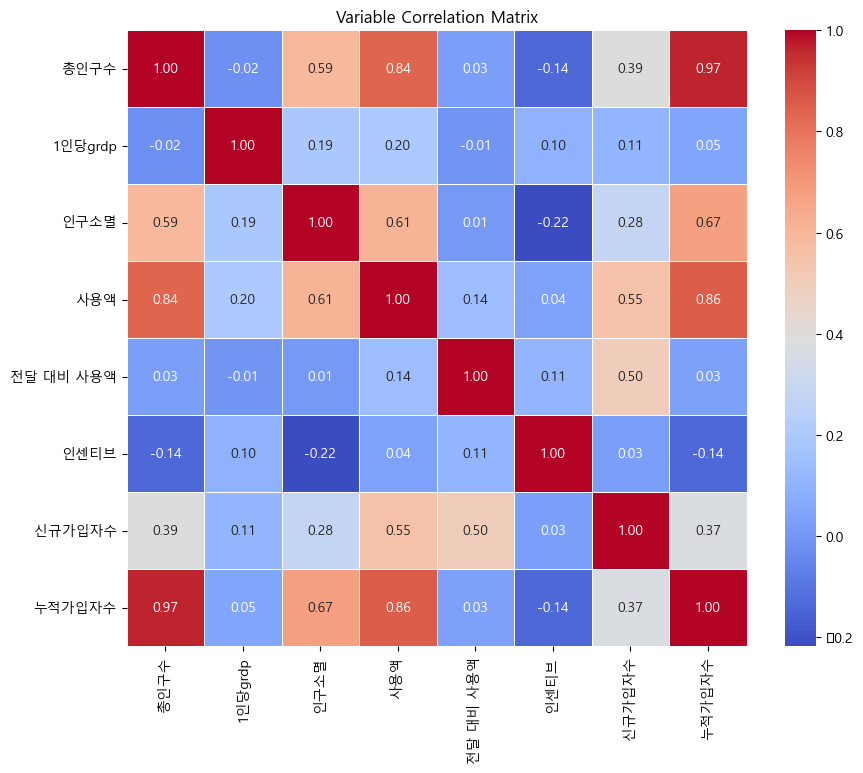

In [31]:
# 상관관계 매트릭스 생성
correlation_matrix = combined_df[['총인구수', '1인당grdp', '인구소멸','사용액','전달 대비 사용액','인센티브','신규가입자수','누적가입자수']].corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Variable Correlation Matrix')
plt.show()